# Body Fat Percentage Prediction
Authors: [RedSkittleFox](https://github.com/RedSkittleFox), [DJAltair](https://github.com/DJAltair)

# Get the Data

## Load the Data

In [56]:
import os
import pandas as pd
import numpy as np 

pctbf_all : pd.DataFrame = pd.read_csv(os.path.join("data", "pctbf_data.csv"), sep="\t")
pctbf_all.head()

,Density,Pct.BF,Age,Weight,Height,Neck,Chest,Abdomen,Waist,Hip,Thigh,Knee,Ankle,Bicep,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,33.543307,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,32.677165,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,34.606299,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,34.015748,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,39.370079,101.9,63.2,42.2,24.0,32.2,27.7,17.7


## Create the Test and Train Sets

In [57]:
from sklearn.model_selection import train_test_split

pctbf_data, pctbf_test = train_test_split(pctbf_all, test_size=0.2, random_state=42)

## Discover the Data

In [58]:
pctbf_all.describe()

,Density,Pct.BF,Age,Weight,Height,Neck,Chest,Abdomen,Waist,Hip,Thigh,Knee,Ankle,Bicep,Forearm,Wrist
count,250.000000,250.0000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,1.055838,19.0316,44.884000,178.083200,70.303000,37.944800,100.662000,92.286800,36.333386,99.651200,59.249600,38.532800,23.074000,32.217200,28.662400,18.220400
std,0.018875,8.2940,12.652227,27.035488,2.616644,2.290454,8.153765,10.207444,4.018679,6.443634,4.912309,2.314136,1.650436,2.922449,2.028677,0.913983
min,0.995000,0.0000,22.000000,118.500000,64.000000,31.100000,79.300000,69.400000,27.322835,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,1.041650,12.4250,35.250000,158.500000,68.250000,36.400000,94.250000,84.525000,33.277559,95.500000,56.000000,36.925000,22.000000,30.200000,27.300000,17.600000
50%,1.054950,19.2000,43.000000,176.125000,70.000000,38.000000,99.600000,90.900000,35.787402,99.300000,58.950000,38.450000,22.800000,32.000000,28.700000,18.300000
75%,1.070400,25.2000,54.000000,196.750000,72.250000,39.400000,105.300000,99.175000,39.045276,103.175000,62.250000,39.875000,24.000000,34.300000,30.000000,18.800000
max,1.108900,47.5000,81.000000,262.750000,77.750000,43.900000,128.300000,126.200000,49.685039,125.600000,74.400000,46.000000,33.900000,39.100000,34.900000,21.400000


In [59]:
pctbf_all.corr()

,Density,Pct.BF,Age,Weight,Height,Neck,Chest,Abdomen,Waist,Hip,Thigh,Knee,Ankle,Bicep,Forearm,Wrist
Density,1.000000,-0.987480,-0.280862,-0.598372,0.043423,-0.470465,-0.680275,-0.809042,-0.809042,-0.616443,-0.542792,-0.478874,-0.244258,-0.475840,-0.354636,-0.317813
Pct.BF,-0.987480,1.000000,0.295051,0.617299,-0.029390,0.488524,0.700670,0.823685,0.823685,0.632675,0.548550,0.492308,0.244556,0.481538,0.364709,0.339008
Age,-0.280862,0.295051,1.000000,-0.016055,-0.245887,0.118738,0.181815,0.242780,0.242780,-0.058134,-0.216084,0.017194,-0.109616,-0.044141,-0.085116,0.217506
Weight,-0.598372,0.617299,-0.016055,1.000000,0.512913,0.810014,0.891286,0.873735,0.873735,0.932691,0.852116,0.842744,0.580906,0.785214,0.683333,0.725104
Height,0.043423,-0.029390,-0.245887,0.512913,1.000000,0.324664,0.223590,0.186690,0.186690,0.396724,0.349590,0.512906,0.394547,0.318573,0.321990,0.396985
Neck,-0.470465,0.488524,0.118738,0.810014,0.324664,1.000000,0.768811,0.728487,0.728487,0.707518,0.668847,0.648166,0.434398,0.708525,0.660787,0.731185
Chest,-0.680275,0.700670,0.181815,0.891286,0.223590,0.768811,1.000000,0.910069,0.910069,0.824908,0.707588,0.697603,0.447086,0.706891,0.599353,0.644477
Abdomen,-0.809042,0.823685,0.242780,0.873735,0.186690,0.728487,0.910069,1.000000,1.000000,0.860517,0.737008,0.710425,0.407464,0.656316,0.530138,0.602325
Waist,-0.809042,0.823685,0.242780,0.873735,0.186690,0.728487,0.910069,1.000000,1.000000,0.860517,0.737008,0.710425,0.407464,0.656316,0.530138,0.602325
Hip,-0.616443,0.632675,-0.058134,0.932691,0.396724,0.707518,0.824908,0.860517,0.860517,1.000000,0.881130,0.809155,0.521185,0.721649,0.603274,0.626401


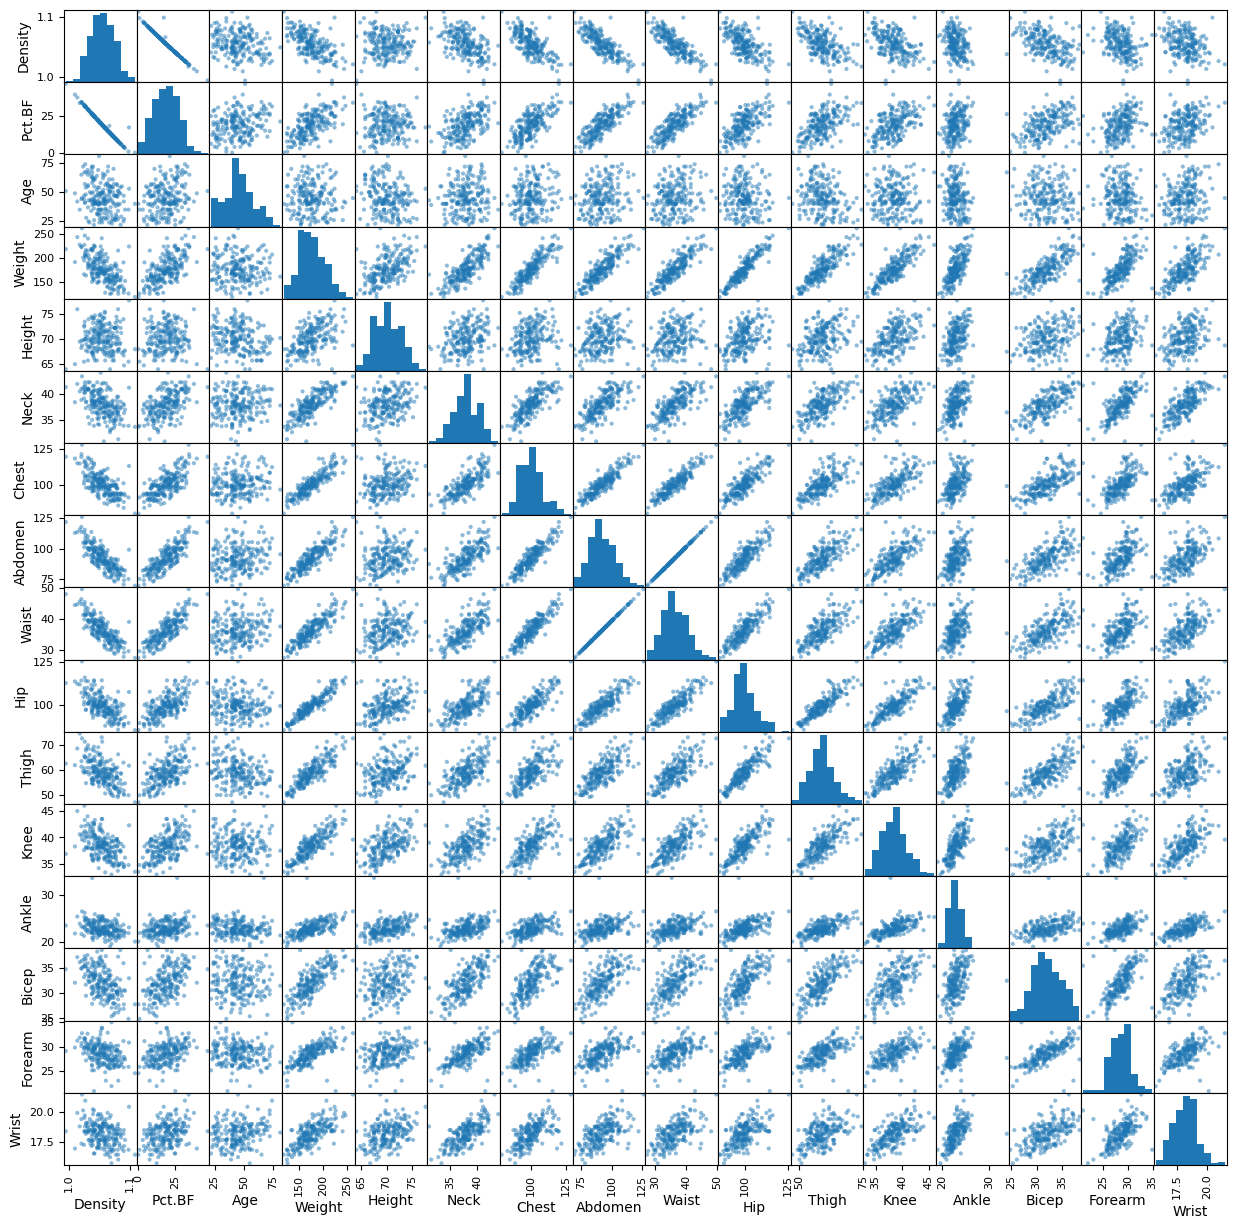

In [60]:
from pandas.plotting import scatter_matrix
scatter_matrix(
    pctbf_data,
    figsize = [15, 15]
    );

# Prepare the Data for the Linear Regression

## Remove attributes with |CORR| < 0.5
We remove the attributes that have the correlation lower than 0.5 in relation to Pct.BF

In [61]:
pctbf_data_corr_filtered = pctbf_data.copy()
pctbf_corr = pctbf_all.corr()
columns = pctbf_data.columns.copy()

for name_c in columns:
    if name_c == "Pct.BF":
        continue
    if abs(pctbf_corr[name_c]["Pct.BF"]) <= 0.5:
            if name_c in pctbf_data_corr_filtered.columns:
                pctbf_data_corr_filtered = pctbf_data_corr_filtered.drop(name_c, axis=1)
            
        
print(pctbf_data_corr_filtered)


     Density  Pct.BF  Weight  Chest  Abdomen      Waist    Hip  Thigh
132   1.0435    24.4  168.25   98.4     87.2  34.330709   98.4   56.0
225   1.0418    25.2  198.50  105.3     96.7  38.070866  106.6   64.0
238   1.0599    17.0  127.50   93.0     79.7  31.377953   87.6   50.7
119   1.0414    25.3  185.25   99.2     98.1  38.622047  101.4   57.1
136   1.0481    22.4  168.25   98.3     88.5  34.842520   98.3   58.1
..       ...     ...     ...    ...      ...        ...    ...    ...
106   1.0593    17.3  194.00  110.1     88.7  34.921260  102.1   57.5
14    1.0484    22.1  187.75  101.3     96.4  37.952756  100.1   69.0
92    1.0785     9.0  184.25   99.6     88.8  34.960630  101.4   57.4
179   1.1089     0.0  118.50   79.3     69.4  27.322835   85.0   47.2
102   1.0412    25.4  177.00  104.0     98.6  38.818898   99.5   59.5

[200 rows x 8 columns]


## Remove attributes with high corelation in relation to each other
We remove these attributes, that are very highly correlated to each other, they can impair the end results.

In [62]:
corr = pctbf_data_corr_filtered.corr()

for name_c in pctbf_data_corr_filtered.columns:
    if name_c == "Pct.BF": continue
    for name_r in pctbf_data_corr_filtered.columns:
        if name_r == "Pct.BF": continue
        if name_r == name_c: continue
        v = corr[name_c][name_r]
        if v > 0.99:
            print(f"{name_c} x {name_r} = {v}")

Abdomen x Waist = 0.9999999999999979
Waist x Abdomen = 0.9999999999999979


We decided to remove one of them - abdomen.

In [63]:
pctbf_data_corr_filtered = pctbf_data_corr_filtered.drop("Abdomen", axis=1)
pctbf_data_corr_filtered

,Density,Pct.BF,Weight,Chest,Waist,Hip,Thigh
132,1.0435,24.4,168.25,98.4,34.330709,98.4,56.0
225,1.0418,25.2,198.50,105.3,38.070866,106.6,64.0
238,1.0599,17.0,127.50,93.0,31.377953,87.6,50.7
119,1.0414,25.3,185.25,99.2,38.622047,101.4,57.1
136,1.0481,22.4,168.25,98.3,34.842520,98.3,58.1
...,...,...,...,...,...,...,...
106,1.0593,17.3,194.00,110.1,34.921260,102.1,57.5
14,1.0484,22.1,187.75,101.3,37.952756,100.1,69.0
92,1.0785,9.0,184.25,99.6,34.960630,101.4,57.4
179,1.1089,0.0,118.50,79.3,27.322835,85.0,47.2


## Remove variables based on their significance

Based on this algorithm we create the extended version of the Linear Regression model which calculates p-values.
https://www.datacourses.com/find-p-value-significance-in-scikit-learn-3810/ (visited on 30-03-2024)

In [64]:
from sklearn import linear_model
from scipy import stats
import scipy as sc
import numpy as np
from sklearn.metrics import mean_squared_error

class LinearRegression(linear_model.LinearRegression):

    def __init__(self,*, fit_intercept=True, copy_X=True, n_jobs=None, positive=False):
        super(LinearRegression,self).__init__(fit_intercept=fit_intercept,copy_X=copy_X,n_jobs=n_jobs,positive=positive)

    # Adding in t-statistics for the coefficients.
    def fit(self,X,y):
        self = super(LinearRegression, self).fit(X,y)
        params = np.append(self.intercept_, self.coef_)
        predictions = self.predict(X)
        new_X = np.append(np.ones((len(X),1)), X, axis=1) # Add row of ones
        M_S_E = (sum((y-predictions)**2))/(len(new_X)-len(new_X[0]))

        # Compute the variance
        # Var = MSE + y^(-2)
        v_b = M_S_E*(np.linalg.inv(
            np.dot(new_X.T,new_X) # Multiply two 2D matrices
            ).diagonal())

        # STD = SQRT(Var)
        s_b = np.sqrt(v_b)

        # Compute t-statistics
        t_b = params / s_b

        # Compute p-valeus
        # p-value = 2 * P(TS >= |ts| | H0 is true) = 2 * (1 - cdf(|ts|))
        p_val =[2*(1-stats.t.cdf(np.abs(i),(len(new_X)-len(new_X[0])))) for i in t_b]
        p_val = np.round(p_val,3)
        self.p_values = p_val[1:]
        self.intercept_p_value = p_val[0]

Compute the significance of the parameters.

In [65]:
import matplotlib.pyplot as plt
import sys

from sklearn.feature_selection import f_regression
from sklearn.metrics import mean_squared_error

pctbf_elim1 = pctbf_data_corr_filtered.drop(["Pct.BF"], axis=1)
pctbf_var = pctbf_data_corr_filtered["Pct.BF"]

X = pctbf_data_corr_filtered.drop(["Pct.BF"], axis=1).copy()
Y = pctbf_data_corr_filtered["Pct.BF"]

reg = LinearRegression()
reg.fit(X, Y)
print(reg.p_values)

for i, v in enumerate(X.columns):
    print(f"{v} = {reg.p_values[i]}")

[0.    0.629 0.62  0.186 0.38  0.039]
Density = 0.0
Weight = 0.629
Chest = 0.62
Waist = 0.186
Hip = 0.38
Thigh = 0.039


Recursively remove the parameters that are the least significant (the lowest p-value).

In [66]:
p_significant = 0.05

while True:
    if len(X.columns) <= 1:
        break

    idx = pd.Series(reg.p_values).idxmax()

    print(f"Variables = {X.columns}")
    print(f"Max p_value : { X.columns[idx] } => { reg.p_values[idx] } ")

    if(reg.p_values[idx] <= p_significant):
        break

    X_tmp = X.copy()
    X_tmp = X_tmp.drop([X.columns[idx]], axis=1)

    reg = LinearRegression()
    reg.fit(X_tmp, Y)

    X = X_tmp

Variables = Index(['Density', 'Weight', 'Chest', 'Waist', 'Hip', 'Thigh'], dtype='object')
Max p_value : Weight => 0.629 
Variables = Index(['Density', 'Chest', 'Waist', 'Hip', 'Thigh'], dtype='object')
Max p_value : Chest => 0.412 
Variables = Index(['Density', 'Waist', 'Hip', 'Thigh'], dtype='object')
Max p_value : Hip => 0.196 
Variables = Index(['Density', 'Waist', 'Thigh'], dtype='object')
Max p_value : Thigh => 0.106 
Variables = Index(['Density', 'Waist'], dtype='object')
Max p_value : Density => 0.0 


# Evaluate Models

## Evaluate `Pct.BF(Density, Waist)`

Train Set RMSE Pct.BF(Density, Waist) = 1.2545522071094009
Train Set R^2 = 0.9776165874798942


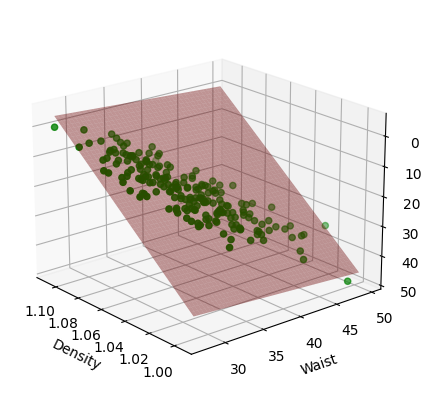

Test Set RMSE Pct.BF(Density, Waist) = 1.2954493649222067
Test Set R^2 = 0.9719119579404796


In [67]:
from sklearn.metrics import mean_squared_error

X = pctbf_data[["Density", "Waist"]].copy()
Y = pctbf_data["Pct.BF"].copy()
lin_reg = LinearRegression()
lin_reg.fit(X, Y)
Y_predicted = lin_reg.predict(X)

mse = mean_squared_error(Y, Y_predicted)
print(f"Train Set RMSE Pct.BF(Density, Waist) = {np.sqrt(mse)}")
print(f"Train Set R^2 = {lin_reg.score(X, Y)}")

fig = plt.figure(figsize = (20, 5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X["Density"], X["Waist"], Y, color = 'g', label="Point Cloud Pct.BF(Density, Waist)")

X1 = np.linspace(X["Density"].min(), X["Density"].max(), 100)
X2 = np.linspace(X["Waist"].min(), X["Waist"].max(), 100)
X1, X2 = np.meshgrid(X1, X2)
func = lambda x1, x2 : lin_reg.coef_[0] * x1 + lin_reg.coef_[1] * x2 + lin_reg.intercept_
ZS = np.array(func(np.ravel(X1), np.ravel(X2)))
Z = ZS.reshape(X1.shape)

ax.set_xlabel('Density') 
ax.set_ylabel('Waist') 
ax.set_zlabel('Pct.BF') 

ax.plot_surface(X1, X2, Z, alpha = 0.4, color='r', shade = True, label="Linear Regression Pct.BF(Density, Waist)")
ax.view_init(-160, 40) 
plt.show()

X_test = pctbf_test[["Density", "Waist"]].copy()
Y_test = pctbf_test["Pct.BF"].copy()
Y_test_predicted = lin_reg.predict(X_test)

test_mse = mean_squared_error(Y_test, Y_test_predicted)
print(f"Test Set RMSE Pct.BF(Density, Waist) = {np.sqrt(test_mse)}")
print(f"Test Set R^2 = {lin_reg.score(X_test, Y_test)}")

## Evaluate `Pct.BF(Waist)`

RMSE Pct.BF(Waist) = 4.639244872257173
Correlation Pct.BF x Waist = 0.8236846526506235
R^2 = 0.6939140367097066
Axes(0.125,0.11;0.775x0.77)
Test Set RMSE Pct.BF(Waist) = 4.939974976975954
Test Set R^2 = 0.5915582954168195


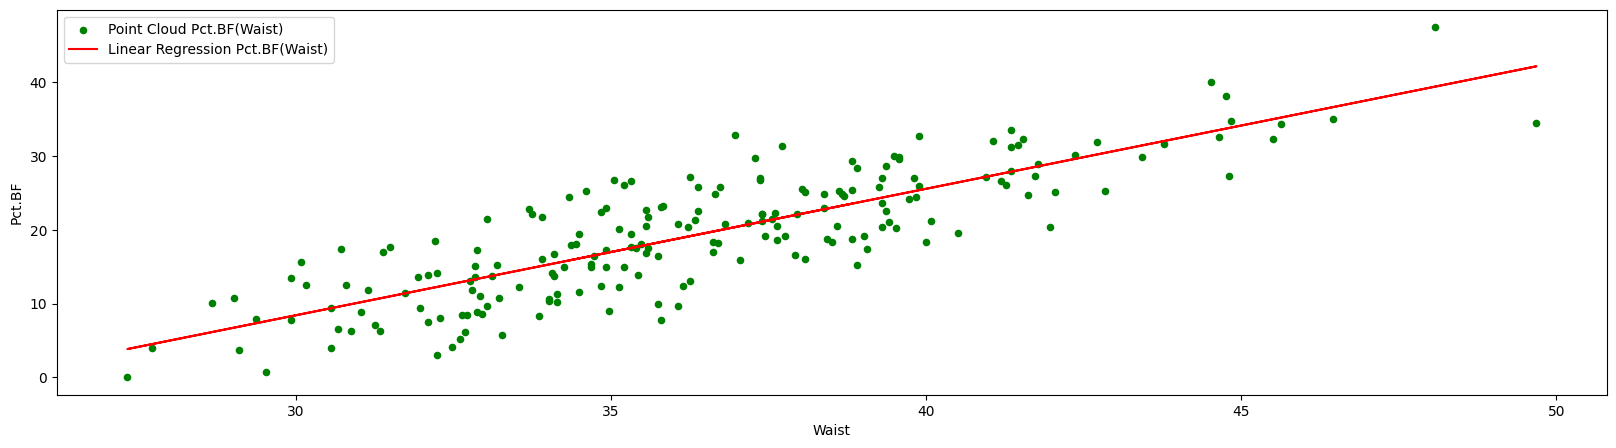

In [68]:
X = pctbf_data[["Waist"]].copy()
Y = pctbf_data["Pct.BF"].copy()
lin_reg = LinearRegression()
lin_reg.fit(X, Y)
Y_predicted = lin_reg.predict(X)

mse = mean_squared_error(Y, Y_predicted)
print(f"RMSE Pct.BF(Waist) = {np.sqrt(mse)}")
print(f"Correlation Pct.BF x Waist = {pctbf_corr['Pct.BF']['Waist']}")
print(f"R^2 = {lin_reg.score(X, Y)}")
plot = pctbf_data[["Waist","Pct.BF"]].plot.scatter(x="Waist", y="Pct.BF", figsize=(20, 5), color='g', label="Point Cloud Pct.BF(Waist)")
plot.plot(X, Y_predicted, color='r', label="Linear Regression Pct.BF(Waist)")
plot.legend()
print(plot)

X_test = pctbf_test[["Waist"]].copy()
Y_test = pctbf_test["Pct.BF"].copy()
Y_test_predicted = lin_reg.predict(X_test)

test_mse = mean_squared_error(Y_test, Y_test_predicted)
print(f"Test Set RMSE Pct.BF(Waist) = {np.sqrt(test_mse)}")
print(f"Test Set R^2 = {lin_reg.score(X_test, Y_test)}")

This model has significantly worse performance compared to the `Pct.BF(Density, Waist)` model.

## Evaluate `Pct.BF(Density)`

RMSE Pct.BF(Density) = 1.3122715039320414


Correlation Pct.BF x Density = -0.987480274937691
R^2 = 0.9755095808843409
Axes(0.125,0.11;0.775x0.77)
Test Set RMSE Pct.BF(Density) = 1.2952698966051397
Test Set R^2 = 0.9719197398956787


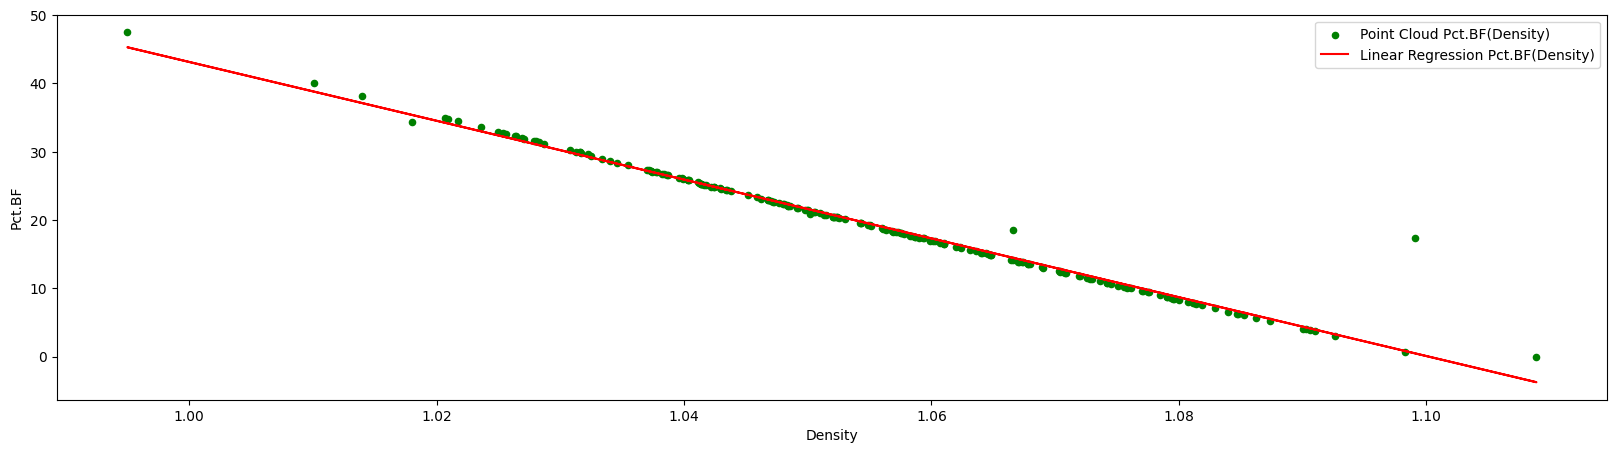

In [69]:
X = pctbf_data[["Density"]].copy()
Y = pctbf_data["Pct.BF"].copy()
lin_reg = LinearRegression()
lin_reg.fit(X, Y)
Y_predicted = lin_reg.predict(X)

mse = mean_squared_error(Y, Y_predicted)
print(f"RMSE Pct.BF(Density) = {np.sqrt(mse)}")
print(f"Correlation Pct.BF x Density = {pctbf_corr['Pct.BF']['Density']}")
print(f"R^2 = {lin_reg.score(X, Y)}")
plot = pctbf_data[["Density","Pct.BF"]].plot.scatter(x="Density", y="Pct.BF", figsize=(20, 5), color='g', label="Point Cloud Pct.BF(Density)")
plot.plot(X, Y_predicted, color='r', label="Linear Regression Pct.BF(Density)")
plot.legend()
print(plot)

X_test = pctbf_test[["Density"]].copy()
Y_test = pctbf_test["Pct.BF"].copy()
Y_test_predicted = lin_reg.predict(X_test)

test_mse = mean_squared_error(Y_test, Y_test_predicted)
print(f"Test Set RMSE Pct.BF(Density) = {np.sqrt(test_mse)}")
print(f"Test Set R^2 = {lin_reg.score(X_test, Y_test)}")

# Conclusion

The best performing models are `Pct.BF(Density, Waist)` and `Pct.BF(Density)`. This models have almost exactly the same performance thus we can assume, that `Waist` parameter is insignificant.